# Evaluation of Segmented Linear Regression

> **Only the profiles: 'LRS70D_YSI_20230822' 'LRS75D_YSI_20230819'**

---

### Import Libraries

In [1]:
import sys
import os
root = os.path.abspath('../..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from piecewise_regression import r_squared_calc


from modules import load, plots, analysis, utils

# styles
plt.style.use('seaborn-v0_8-white')

---

### Load data

In [2]:
name_70 = 'LRS70D_YSI_20230822'  
name_75 = 'LRS75D_YSI_20230819'

In [3]:
path_json_70 = f'{root}/data/results/{name_70}_results.json'
path_json_75 = f'{root}/data/results/{name_75}_results.json'

df_70 = load.load_data(filepath=path_json_70, json=True)
df_75 = load.load_data(filepath=path_json_75, json=True)

In [4]:
path_processed_70 = f'{root}/data/processed/{name_70}_processed.csv'
path_processed_75 = f'{root}/data/processed/{name_75}_processed.csv'

x_processed_70, y_processed_70 = load.load_data(filepath=path_processed_70, 
                            x_col='Vertical Position [m]',
                            y_col='Corrected sp Cond [uS/cm]'
                            )

x_processed_75, y_processed_75 = load.load_data(filepath=path_processed_75,
                            x_col='Vertical Position [m]',
                            y_col='Corrected sp Cond [uS/cm]'
                            )

In [5]:
df_75

,trial_1,trial_2,trial_3,trial_4,trial_5
df,"{'bic': {'0': 143864.9213957967, '1': 137890.5...","{'bic': {'0': 143864.9213957967, '1': 137890.5...","{'bic': {'0': 143864.9213957967, '1': 137890.5...","{'bic': {'0': 143864.9213957967, '1': 137890.5...","{'bic': {'0': 143864.9213957967, '1': 137890.5..."
best_n_breakpoint_bic,2,2,2,2,2
min_bic_n_breakpoint,5,8,7,6,9
best_n_breakpoint_rss,2,2,2,2,2


---

### Optimal `n_breakpoint`

In [6]:
trial_70 = analysis.select_best_trial(path_json_70)
trial_select_70 = df_70[trial_70[0]]
N_BREAKPOINT_70 = df_70.loc['best_n_breakpoint_bic'].mode().iloc[0] # alternative, select 'best_n_breakpoint_rss'


trial_75 = analysis.select_best_trial(path_json_75)
trial_select_75 = df_75[trial_75[0]]
N_BREAKPOINT_75 = df_75.loc['best_n_breakpoint_bic'].mode().iloc[0] # alternative, select 'best_n_breakpoint_rss'

In [7]:
# Elbow plot 70
x_values = np.array(list(trial_select_70['df']['n_breakpoints'].values()))
y_values = np.array(list(trial_select_70['df']['bic'].values()))
secondary_x = np.array(list(trial_select_70['df']['n_breakpoints'].values()))
secondary_y = np.array(list(trial_select_70['df']['rss'].values()))

plots.plot_data(
    x_values=x_values,
    y_values=y_values,
    plot_mode='lines+markers',
    x_axis_label="Number Breakpoints",
    y_axis_label="BIC",
    secondary_x=secondary_x,
    secondary_y=secondary_y,
    use_secondary_axis=True,
    y2_axis_label="RSS",
    trace_names=['BIC', 'RSS'],
    title=f"Elbow Plot: <b>{name_70}<b>",
)

# Elbow plot 75
x_values = np.array(list(trial_select_75['df']['n_breakpoints'].values()))
y_values = np.array(list(trial_select_75['df']['bic'].values()))
secondary_x = np.array(list(trial_select_75['df']['n_breakpoints'].values()))
secondary_y = np.array(list(trial_select_75['df']['rss'].values()))

plots.plot_data(
    x_values=x_values,
    y_values=y_values,
    plot_mode='lines+markers',
    x_axis_label="Number Breakpoints",
    y_axis_label="BIC",
    secondary_x=secondary_x,
    secondary_y=secondary_y,
    use_secondary_axis=True,
    y2_axis_label="RSS",
    trace_names=['BIC', 'RSS'],
    title=f"Elbow Plot: <b>{name_75}<b>",
)

---

### Evaluation

In [8]:
# Params 70
params_70 = utils.get_breakpoint_data(trial_select_70['df'], N_BREAKPOINT_70)

# Params 75
params_75 = utils.get_breakpoint_data(trial_select_75['df'], N_BREAKPOINT_75)


In [9]:
# Model 70
model_70 = utils.rebuild_model(x_processed_70,y_processed_70,params_70, tolerance=1e-2, min_distance=0.001)

# Model 75
model_75 = utils.rebuild_model(x_processed_75,y_processed_75,params_75, tolerance=1e-6, min_distance=0.008)

In [10]:
# Globals 70
RSS_70, TSS_70, R2_70, R2_ajus_70 = r_squared_calc.get_r_squared(y_processed_70, 
                                                    model_70.predict(x_processed_70), 
                                                    len(params_70))

# Globals 75
RSS_75, TSS_75, R2_75, R2_ajus_75 = r_squared_calc.get_r_squared(y_processed_75, 
                                                    model_75.predict(x_processed_75), 
                                                    len(params_75))

print("RSS_70: ", RSS_70)
print("TSS_70: ", TSS_70)
print("R2_70: ", R2_70)
print("R2_ajus_70: ", R2_ajus_70)

print("RSS_75: ", RSS_75)
print("TSS_75: ", TSS_75)
print("R2_75: ", R2_75)
print("R2_ajus_75: ", R2_ajus_75)

RSS_70:  3508286130.2295103
TSS_70:  3188239124841.414
R2_70:  0.9988996163735353
R2_ajus_70:  0.9988989392143806
RSS_75:  7086676885.164476
TSS_75:  4419746600758.689
R2_75:  0.9983965875138752
R2_ajus_75:  0.9983959637797649


In [11]:
# Per segment 70
metric_per_segment_70 = analysis.calculate_metrics_per_segment(model_70)

# Per segment 75
metric_per_segment_75 = analysis.calculate_metrics_per_segment(model_75)

In [12]:
# Breakpoints 70
breakpoints_70 = analysis.extract_breakpoints(model_70)

# Breakpoints 75
breakpoints_75 = analysis.extract_breakpoints(model_75)

In [13]:
breakpoints_70

,Breakpoint X Position,Breakpoint Y Position,Confidence Interval (X)
1,11.580626,692.704085,"(11.57841499166805, 11.582837372932596)"
2,11.823441,49528.422395,"(11.821256775761224, 11.825626064864469)"


In [14]:
breakpoints_75

,Breakpoint X Position,Breakpoint Y Position,Confidence Interval (X)
1,17.95637,1010.097661,"(17.946047178458997, 17.966692296360428)"
2,21.63916,49681.489758,"(21.62760542881007, 21.650714000225456)"


---

### Final results


In [15]:

# Visualizamos los datos procesados junto con los modelos obtenidos de 70
df_ms_70 = pd.DataFrame({'n_breakpoints': trial_select_70['df']['n_breakpoints'], 
                    'estimates': trial_select_70['df']['estimates']})

plots.interactive_segmented_regression(x=x_processed_70,
                                       y=y_processed_70, 
                                       df=df_ms_70, 
                                       title=name_70,
                                       breakpoints=N_BREAKPOINT_70)

# Visualizamos los datos procesados junto con los modelos obtenidos de 75
df_ms_75 = pd.DataFrame({'n_breakpoints': trial_select_75['df']['n_breakpoints'], 
                    'estimates': trial_select_75['df']['estimates']})

plots.interactive_segmented_regression(x=x_processed_75,
                                       y=y_processed_75, 
                                       df=df_ms_75, 
                                       title=name_75,
                                       breakpoints=N_BREAKPOINT_75)


interactive(children=(IntSlider(value=2, description='n_breakpoints', max=10), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=2, description='n_breakpoints', max=10), Output()), _dom_classes=('widge…

#### Models per segment

In [16]:
# Segments 70
segments_70 = utils.extract_segments(model_70)
segments_70

# Segments 75
segments_75 = utils.extract_segments(model_75)
segments_75

{'segments': [{'segment': 1,
   'data_x': array([6.0000e-03, 1.9000e-02, 2.2000e-02, ..., 1.7942e+01, 1.7954e+01,
          1.7956e+01], shape=(4324,)),
   'data_y': array([ 971.16842735,  971.11982051,  971.09100557, ..., 1460.0273913 ,
          1471.36042512, 1488.74938164], shape=(4324,)),
   'fitted_model': {'slope': np.float64(3.4239366918487257),
    'intercept': np.float64(948.6161879137379),
    'fitted_y': array([ 948.63673153,  948.68124271,  948.69151452, ..., 1010.04846004,
           1010.08954728, 1010.09639515], shape=(4324,))}},
  {'segment': 2,
   'data_x': array([17.962, 17.963, 17.966, 17.972, 17.975, 17.978, 17.989, 17.995,
          18.   , 18.005, 18.021, 18.022, 18.024, 18.035, 18.038, 18.039,
          18.048, 18.051, 18.054, 18.064, 18.068, 18.07 , 18.077, 18.082,
          18.084, 18.089, 18.1  , 18.104, 18.109, 18.11 , 18.113, 18.116,
          18.117, 18.121, 18.127, 18.132, 18.135, 18.144, 18.148, 18.151,
          18.159, 18.161, 18.169, 18.17 , 18.174, 1

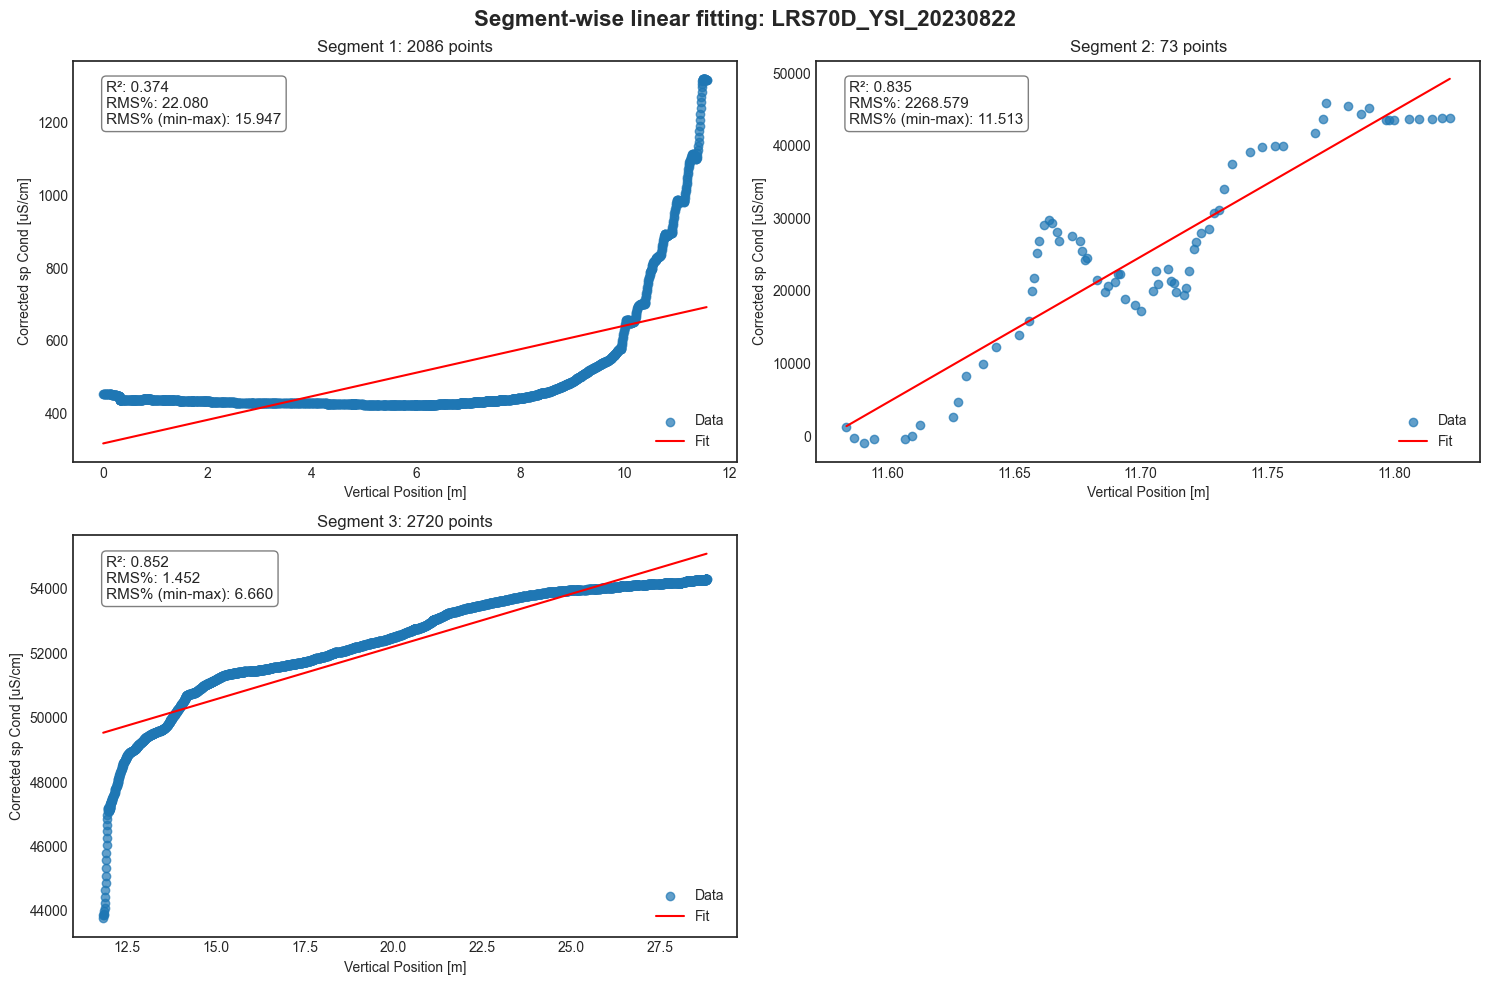

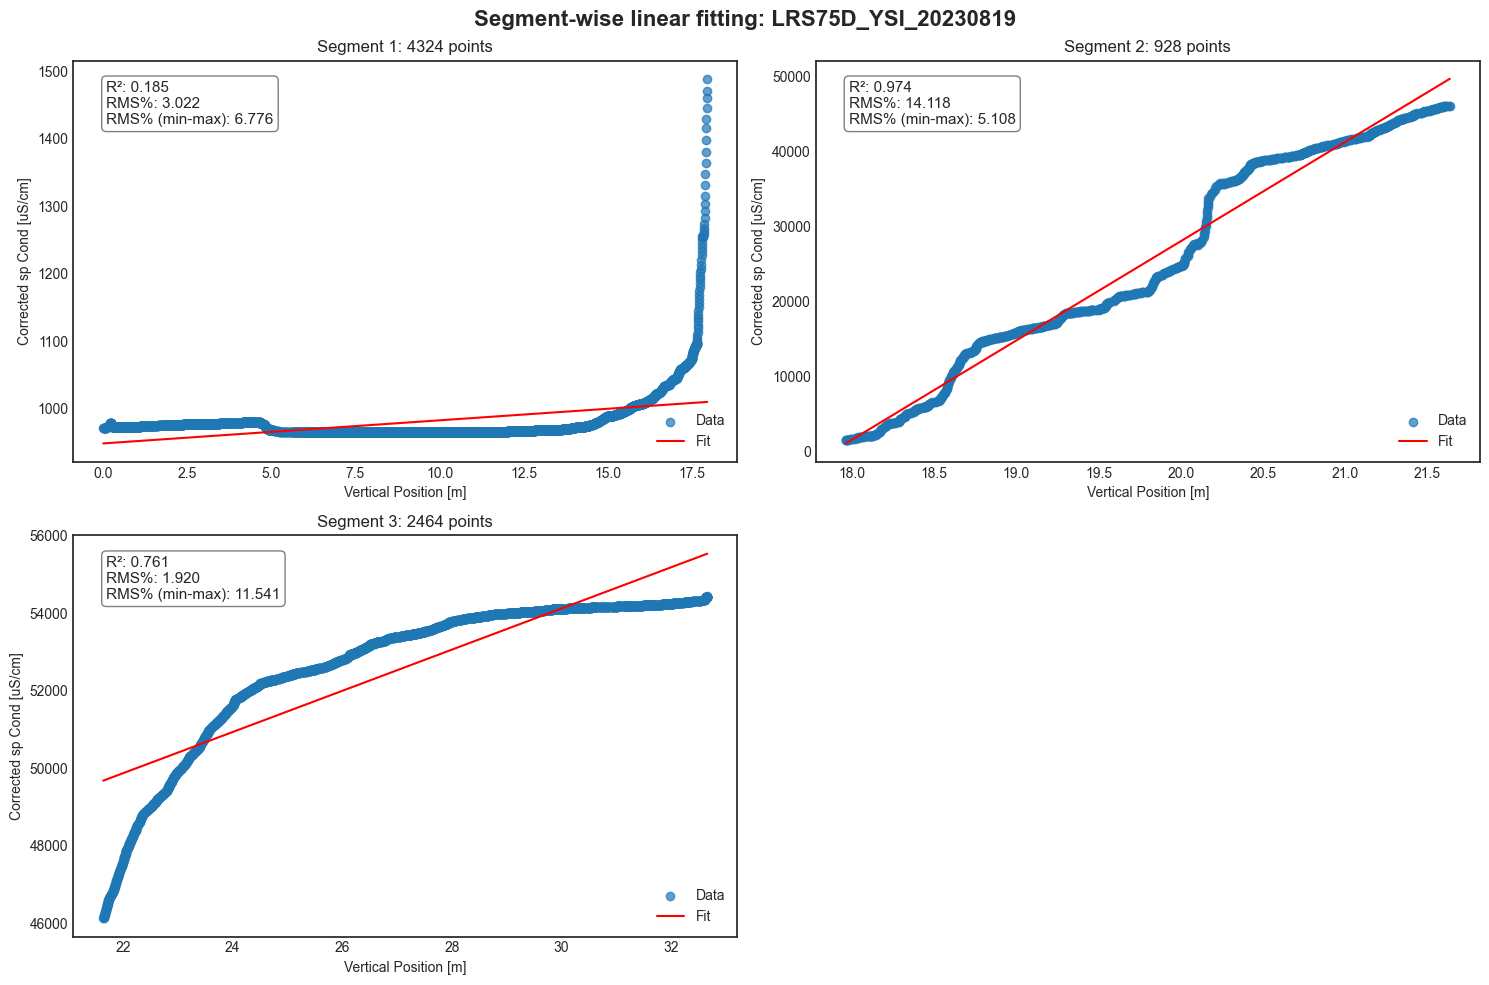

In [17]:

# Plot 70
plots.plot_segments(segments_70, 
                    metric_per_segment_70, 
                    title=f"Segment-wise linear fitting: {name_70}")

# Plot 75
plots.plot_segments(segments_75, 
                    metric_per_segment_75, 
                    title=f"Segment-wise linear fitting: {name_75}")